In [1]:
import boson_sampler as bs
import block_boson_sampler as b_bs
import sf_boson_sampler as sf_bs
import random_scheme_generator as scheme_generator

import os
import itertools

from tqdm import tqdm
import matplotlib.pyplot as plt

# Generate random scheme

#### Write list of blocks:
blocks = [[number_of_modes, bs_gate_number, repetitions_num], ...]

#### Choose the name for the file with a scheme. 

By default: 'curr_scheme.txt'

In [2]:
blocks = [[2, 1, 4]]
rand_scheme_file_name = 'curr_scheme.txt'

scheme_generator.generate_random_block_scheme(blocks, rand_scheme_file_name)

# Simple sampler
### Import the scheme and calculate its matrix

In [3]:
simple_scheme_file_name = 'curr_scheme_simple.txt'
scheme_matrix_file_name = 'scheme_unitary.txt'
block_scheme_file_name = 'curr_scheme.txt'

number_of_modes = scheme_generator.to_simple_scheme(block_scheme_file_name, simple_scheme_file_name)

scheme = bs.Scheme()
scheme.upload_scheme_from_file(simple_scheme_file_name)

print("\n")
scheme.calc_scheme_matrix()
scheme.export_scheme_matrix(scheme_matrix_file_name)

scheme.print_scheme_matrix()

--> Scheme was successfully uploaded
--> Number of modes:  5


--> The time for dot product is : 0.0 ms
--> Unitary was successfully exported
--> U:
 [[-0.75 -0.017j -0.172-0.638j  0.   +0.j     0.   +0.j     0.   +0.j   ]
 [-0.14 +0.476j  0.563+0.j    -0.172-0.638j  0.   +0.j     0.   +0.j   ]
 [ 0.279+0.171j  0.097-0.359j  0.563+0.j    -0.172-0.638j  0.   +0.j   ]
 [ 0.158-0.149j -0.213-0.124j  0.097-0.359j  0.563+0.j    -0.172-0.638j]
 [ 0.094+0.166j  0.151-0.156j  0.287+0.159j -0.119+0.482j -0.75 +0.017j]]


## Boson sampler

### Set parameters
#### Choose a file name for schema import

Defaults to the filename of the random schema

In [10]:
init_config = [1, 1, 1, 1, 1, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
batch_size = 100000

bs_sample_file_name = 'sample.txt'

### Sample

In [11]:
sampler = bs.BosonSampler(scheme, init_config)
sampler.export_ground_truth()
sampler.sample(batch_size, bs_sample_file_name)

MemoryError: Unable to allocate 105. GiB for an array with shape (118755, 118755) and data type float64

### Print sample file

In [6]:
with open(os.path.join('samples', bs_sample_file_name), 'r') as f_data:
    for f_sample in f_data:
        print(f_sample.strip())

[0, 0, 1, 1, 1, 1]
[0, 4, 0, 0, 0, 0]
[2, 0, 0, 0, 1, 1]
[2, 0, 1, 0, 1, 0]
[0, 1, 0, 1, 0, 2]
[0, 1, 2, 0, 1, 0]
[0, 3, 0, 1, 0, 0]
[0, 0, 2, 1, 0, 1]
[0, 2, 1, 1, 0, 0]
[2, 0, 0, 0, 1, 1]
[2, 0, 0, 0, 1, 1]
[2, 0, 0, 0, 0, 2]
[2, 2, 0, 0, 0, 0]
[0, 0, 3, 0, 1, 0]
[0, 1, 2, 0, 1, 0]
[0, 4, 0, 0, 0, 0]
[2, 0, 2, 0, 0, 0]
[0, 0, 0, 3, 1, 0]
[0, 0, 1, 0, 1, 2]
[0, 0, 0, 1, 0, 3]
[1, 0, 0, 2, 0, 1]
[0, 1, 0, 1, 1, 1]
[0, 0, 1, 0, 1, 2]
[3, 1, 0, 0, 0, 0]
[0, 1, 2, 0, 0, 1]
[2, 0, 0, 0, 1, 1]
[0, 1, 1, 1, 0, 1]
[1, 0, 0, 1, 2, 0]
[0, 1, 1, 0, 0, 2]
[0, 1, 2, 0, 0, 1]
[0, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 0, 1]
[0, 2, 1, 1, 0, 0]
[0, 3, 0, 1, 0, 0]
[0, 0, 0, 2, 0, 2]
[0, 0, 0, 3, 1, 0]
[0, 0, 2, 0, 0, 2]
[2, 0, 0, 0, 1, 1]
[2, 1, 0, 1, 0, 0]
[2, 0, 2, 0, 0, 0]
[0, 3, 1, 0, 0, 0]
[2, 0, 0, 0, 2, 0]
[3, 0, 0, 1, 0, 0]
[0, 4, 0, 0, 0, 0]
[2, 2, 0, 0, 0, 0]
[2, 0, 1, 0, 1, 0]
[0, 2, 1, 1, 0, 0]
[2, 2, 0, 0, 0, 0]
[2, 0, 1, 0, 0, 1]
[2, 0, 1, 0, 0, 1]
[0, 2, 1, 0, 0, 1]
[0, 2, 1, 1, 0, 0]
[0, 0, 0, 2,

## Distinguishable Sampler

In [60]:
modes_num = number_of_modes
#ph_num = modes_num
ph_num = 3

init_config = [1 if i < ph_num else 0 for i in range(modes_num)]
print(init_config)

batch_size = 200

[1, 1, 1, 0]


In [61]:
distinguishable_sampler = bs.DistinguishableSampler(scheme, init_config)
distinguishable_sampler.sample(batch_size, samples_num=1)

Sampling...: 100%|█████████████████████████████████████████████████| 200/200 [00:00<00:00, 9114.09it/s]

--> Distinguishable Samples successfully exported


## SF Boson sampler

### Set parameters

In [64]:
modes_num = number_of_modes
injected_photons_num = 3
batch_size = 2000

sf_sample_file_name = 'sf_sample.txt'

### SF Sample

In [65]:
sf_bs.boson_sampling(modes_num, injected_photons_num, batch_size, sf_sample_file_name)

--> Scheme was successfully uploaded
--> Probability for uniform distribution:  0.05
--> complete:  0 / 2000
--> complete:  10 / 2000
--> complete:  20 / 2000
--> complete:  30 / 2000
--> complete:  40 / 2000
--> complete:  50 / 2000
--> complete:  60 / 2000
--> complete:  70 / 2000
--> complete:  80 / 2000
--> complete:  90 / 2000
--> complete:  100 / 2000
--> complete:  110 / 2000
--> complete:  120 / 2000
--> complete:  130 / 2000
--> complete:  140 / 2000
--> complete:  150 / 2000
--> complete:  160 / 2000
--> complete:  170 / 2000
--> complete:  180 / 2000
--> complete:  190 / 2000
--> complete:  200 / 2000
--> complete:  210 / 2000
--> complete:  220 / 2000
--> complete:  230 / 2000
--> complete:  240 / 2000
--> complete:  250 / 2000
--> complete:  260 / 2000
--> complete:  270 / 2000
--> complete:  280 / 2000
--> complete:  290 / 2000
--> complete:  300 / 2000
--> complete:  310 / 2000
--> complete:  320 / 2000
--> complete:  330 / 2000
--> complete:  340 / 2000
--> complete:  3

### Print sample file

In [37]:
with open(os.path.join('samples', sf_sample_file_name), 'r') as f_data:
    for f_sample in f_data:
        print(f_sample.strip())

[2 0 0 1]	0.0759
[1 1 1 0]	0.1088
[0 0 2 1]	0.0413
[0 0 2 1]	0.0413
[1 1 1 0]	0.1088
[2 1 0 0]	0.0342
[0 0 1 2]	0.1169
[0 0 0 3]	0.0424
[0 3 0 0]	0.0406
[3 0 0 0]	0.0856
[2 0 0 1]	0.0759
[1 2 0 0]	0.1193
[2 0 1 0]	0.1213
[0 0 2 1]	0.0413
[3 0 0 0]	0.0856
[2 0 0 1]	0.0759
[2 0 0 1]	0.0759
[0 0 1 2]	0.1169
[0 2 0 1]	0.0737
[2 0 0 1]	0.0759
[3 0 0 0]	0.0856
[2 0 1 0]	0.1213
[0 1 0 2]	0.007
[1 0 1 1]	0.011
[0 2 1 0]	0.003
[2 0 0 1]	0.0759
[2 0 1 0]	0.1213
[2 1 0 0]	0.0342
[1 2 0 0]	0.1193
[2 0 0 1]	0.0759
[2 0 1 0]	0.1213
[0 0 2 1]	0.0413
[3 0 0 0]	0.0856
[1 1 1 0]	0.1088
[0 0 2 1]	0.0413
[1 2 0 0]	0.1193
[0 0 1 2]	0.1169
[1 1 1 0]	0.1088
[0 1 1 1]	0.0534
[2 0 1 0]	0.1213
[1 1 1 0]	0.1088
[2 1 0 0]	0.0342
[0 0 0 3]	0.0424
[3 0 0 0]	0.0856
[0 1 2 0]	0.0179
[0 1 0 2]	0.007
[2 0 1 0]	0.1213
[1 1 0 1]	0.0165
[0 0 1 2]	0.1169
[1 1 1 0]	0.1088
[0 1 1 1]	0.0534
[0 0 1 2]	0.1169
[3 0 0 0]	0.0856
[0 3 0 0]	0.0406
[0 0 1 2]	0.1169
[1 1 1 0]	0.1088
[2 1 0 0]	0.0342
[0 0 1 2]	0.1169
[2 0 0 1]	0.0759
[

# Block sampler
### Import the scheme

In [84]:
block_scheme = b_bs.Scheme()
block_scheme.upload_scheme_from_file()

--> The time for dot product is : 0.9970664978027344 ms
--> Scheme was successfully uploaded


### Set parameters

In [85]:
modes_num = len(block_scheme.blocks) + block_scheme.blocks[-1]['block'].number_of_modes - 1
#ph_num = modes_num
ph_num = 3

init_config = [1 if i < ph_num else 0 for i in range(modes_num)]
print(init_config)

batch_size = 1

[1, 1, 1, 0]


### Sampling

In [86]:
block_sampler = b_bs.BosonSampler(block_scheme, init_config)
block_sampler.sample(batch_size, samples_num=1)

Sampling...: 100%|█████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1002.94it/s]

--> Time for sampling : 1.9927024841308594 ms
--> Samples successfully exported


# Different input configurations

In [10]:
batch_size = 30000
init_config_step = 10

def calc_fock_basis(ph_num, modes_num):
    basis = []
    slots_num = ph_num + modes_num
    all_comb_bars = list(itertools.combinations(range(1, slots_num), modes_num - 1))
    for bars in all_comb_bars:
        bars = list(bars)
        bars.append(slots_num)
        bars.insert(0, 0)
        basis_vec = []
        for i in range(modes_num):
            basis_vec.append(bars[i+1] - bars[i] - 1)
        basis.append(basis_vec)

    return basis

init_config_list = calc_fock_basis(6, 6)

block_scheme = b_bs.Scheme()
block_scheme.upload_scheme_from_file()

j = -1
for i in range(0, len(init_config_list), init_config_step):
    j += 1
    
    block_sampler_file_name = 'block_sample_' + str(j+1)
    ground_truth_file_name = 'ground_truth_' + str(j+1)
    
    single_sampler = bs.BosonSampler(scheme, init_config_list[i])
    single_sampler.export_ground_truth(output_file_name=ground_truth_file_name)
    
    block_sampler = b_bs.BosonSampler(block_scheme, init_config_list[i])
    block_sampler.sample(batch_size, samples_num=1, file_name=block_sampler_file_name)
    

--> The time for dot product is : 0.9987354278564453 ms
--> Scheme was successfully uploaded


Sampling...: 100%|█████████████████████████████████████████████████████████████| 30000/30000 [00:25<00:00, 1171.18it/s]


--> Time for sampling : 25615.18955230713 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:30<00:00, 971.05it/s]


--> Time for sampling : 30899.578332901 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:35<00:00, 852.87it/s]


--> Time for sampling : 35175.14419555664 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:30<00:00, 975.93it/s]


--> Time for sampling : 30750.131607055664 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:38<00:00, 786.78it/s]


--> Time for sampling : 38129.88018989563 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:34<00:00, 861.47it/s]


--> Time for sampling : 34824.23496246338 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:53<00:00, 558.88it/s]


--> Time for sampling : 53679.115295410156 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:53<00:00, 557.24it/s]


--> Time for sampling : 53837.89610862732 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:44<00:00, 676.27it/s]


--> Time for sampling : 44363.25669288635 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:51<00:00, 583.51it/s]


--> Time for sampling : 51422.49774932861 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:14<00:00, 403.78it/s]


--> Time for sampling : 74300.25267601013 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:51<00:00, 586.75it/s]


--> Time for sampling : 51129.0168762207 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:52<00:00, 566.53it/s]


--> Time for sampling : 52954.35690879822 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:57<00:00, 524.20it/s]


--> Time for sampling : 57239.87889289856 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:21<00:00, 366.63it/s]


--> Time for sampling : 81827.12936401367 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:27<00:00, 342.72it/s]


--> Time for sampling : 87539.6957397461 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:29<00:00, 335.27it/s]


--> Time for sampling : 89486.10019683838 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:55<00:00, 259.00it/s]


--> Time for sampling : 115837.09192276001 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:06<00:00, 237.01it/s]


--> Time for sampling : 126582.26728439331 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:31<00:00, 198.32it/s]


--> Time for sampling : 151278.77163887024 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [03:23<00:00, 147.40it/s]


--> Time for sampling : 203525.9828567505 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:45<00:00, 654.02it/s]


--> Time for sampling : 45871.42515182495 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:08<00:00, 437.36it/s]


--> Time for sampling : 68595.91221809387 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:18<00:00, 382.81it/s]


--> Time for sampling : 78374.83477592468 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:57<00:00, 522.97it/s]


--> Time for sampling : 57374.93991851807 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [00:57<00:00, 517.69it/s]


--> Time for sampling : 57959.45954322815 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:09<00:00, 432.22it/s]


--> Time for sampling : 69411.3347530365 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:35<00:00, 313.97it/s]


--> Time for sampling : 95551.86128616333 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:50<00:00, 271.90it/s]


--> Time for sampling : 110341.11166000366 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:51<00:00, 268.86it/s]


--> Time for sampling : 111580.41405677795 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:41<00:00, 296.67it/s]


--> Time for sampling : 101121.95324897766 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:31<00:00, 198.22it/s]


--> Time for sampling : 151358.92391204834 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:17<00:00, 218.97it/s]


--> Time for sampling : 137012.81094551086 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [03:03<00:00, 163.79it/s]


--> Time for sampling : 183159.86514091492 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:24<00:00, 355.62it/s]


--> Time for sampling : 84359.6441745758 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:50<00:00, 271.37it/s]


--> Time for sampling : 110549.66711997986 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:48<00:00, 277.20it/s]


--> Time for sampling : 108223.85692596436 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:34<00:00, 317.16it/s]


--> Time for sampling : 94599.8010635376 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:28<00:00, 202.67it/s]


--> Time for sampling : 148023.6577987671 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:10<00:00, 229.16it/s]


--> Time for sampling : 130920.06063461304 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:56<00:00, 169.95it/s]


--> Time for sampling : 176526.15642547607 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [01:39<00:00, 300.81it/s]


--> Time for sampling : 99736.49430274963 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:03<00:00, 242.27it/s]


--> Time for sampling : 123829.39338684082 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:50<00:00, 175.96it/s]


--> Time for sampling : 170492.00248718262 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [04:36<00:00, 108.64it/s]


--> Time for sampling : 276147.92585372925 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [02:39<00:00, 188.24it/s]


--> Time for sampling : 159369.54426765442 ms
--> Samples successfully exported


Sampling...: 100%|██████████████████████████████████████████████████████████████| 30000/30000 [04:05<00:00, 122.39it/s]

--> Time for sampling : 245135.9839439392 ms
--> Samples successfully exported


# One sample time SM

In [50]:
time_data = []

In [79]:
avg_samples_num = 300

In [120]:
block_scheme = b_bs.Scheme()
block_scheme.upload_scheme_from_file()

modes_num = len(block_scheme.blocks) + block_scheme.blocks[-1]['block'].number_of_modes - 1
ph_num = modes_num

init_config = [1 if i < ph_num else 0 for i in range(modes_num)]
print(init_config)

--> The time for dot product is : 1.9946098327636719 ms
--> Scheme was successfully uploaded
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [121]:
full_time = 0
for _ in tqdm(range(avg_samples_num), desc="avg..."):
    block_sampler = b_bs.BosonSampler(block_scheme, init_config)
    full_time += block_sampler.one_sample_time()
avg_sample_time = full_time / avg_samples_num
print(avg_sample_time)

time_data.append(avg_sample_time)

avg...: 100%|████████████████████████████████████████████████████████| 300/300 [01:15<00:00,  3.99it/s]

250.39808750152588


In [122]:
print(time_data)

[0.6881586710611979, 8.408344586690268, 19.93737856547038, 30.019481976826984, 44.8504384358724, 55.42356808980306, 67.73437897364299, 86.41688744227092, 87.59129444758098, 104.57482576370239, 113.01649173100789, 122.86883513132732, 139.6980595588684, 145.29018004735312, 158.1535530090332, 184.5141061147054, 192.42059389750162, 207.2132714589437, 199.55088218053183, 250.39808750152588]


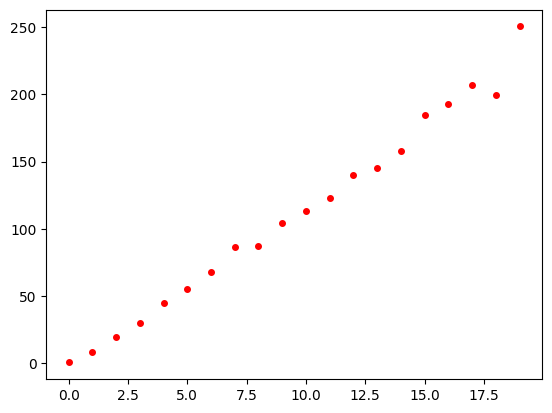

In [123]:
plt.plot(time_data, 'ro', label='time_data', markersize=4)

# One sample time BF

In [14]:
time_data = [0.6881586710611979, 8.408344586690268, 19.93737856547038, 30.019481976826984, 44.8504384358724, 55.42356808980306, 67.73437897364299, 86.41688744227092, 87.59129444758098, 104.57482576370239, 113.01649173100789, 122.86883513132732, 139.6980595588684, 145.29018004735312, 158.1535530090332, 184.5141061147054, 192.42059389750162, 207.2132714589437, 199.55088218053183, 250.39808750152588]

In [16]:
time_data_bf = []

In [3]:
avg_samples_num = 300

In [41]:
simple_scheme_file_name = 'curr_scheme_simple.txt'
scheme_matrix_file_name = 'scheme_unitary.txt'
block_scheme_file_name = 'curr_scheme.txt'

number_of_modes = scheme_generator.to_simple_scheme(block_scheme_file_name, simple_scheme_file_name)

scheme = bs.Scheme()
scheme.upload_scheme_from_file(simple_scheme_file_name)

print("\n")
scheme.calc_scheme_matrix()
scheme.export_scheme_matrix(scheme_matrix_file_name)

scheme.print_scheme_matrix()

modes_num = scheme.number_of_modes
ph_num = modes_num

init_config = [1 if i < ph_num else 0 for i in range(modes_num)]
print(init_config)

--> Scheme was successfully uploaded
--> Number of modes:  10


--> The time for dot product is : 8.98122787475586 ms
--> Unitary was successfully exported
--> U:
 [[ 0.339-0.401j  0.204+0.036j  0.79 +0.228j  0.072-0.005j  0.   +0.j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j   ]
 [-0.329-0.167j  0.768-0.097j -0.18 +0.212j -0.172+0.391j  0.072-0.005j
   0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j   ]
 [-0.01 -0.563j -0.457-0.228j -0.192+0.198j -0.169+0.36j  -0.172+0.391j
   0.072-0.005j  0.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.197-0.14j   0.234+0.072j -0.247-0.119j  0.677-0.051j -0.169+0.36j
  -0.172+0.391j  0.072-0.005j  0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.285-0.015j -0.076-0.109j -0.051-0.149j -0.109+0.24j   0.677-0.051j
  -0.169+0.36j  -0.172+0.391j  0.072-0.005j  0.   +0.j     0.   +0.j   ]
 [ 0.096+0.199j  0.088+0.084j  0.072-0.148j  0.055+0.175j -0.109+0.24j
   0.677-0.051j -0.169+0.36j  -0.172+0.391j 

In [42]:
full_time = 0
for _ in tqdm(range(avg_samples_num), desc="avg..."):
    sampler = bs.BosonSampler(scheme, init_config)
    full_time += sampler.time_one_sample
avg_sample_time = full_time / avg_samples_num
print(avg_sample_time)

time_data_bf.append(avg_sample_time)

avg...:   0%|                                                                  | 0/300 [00:00<?, ?it/s]


MemoryError: Unable to allocate 63.6 GiB for an array with shape (92378, 92378) and data type float64

In [39]:
print(time_data_bf)

[0.6253393491109213, 2.3171091079711914, 9.369308153788248, 40.07498343785604, 184.92985089619955, 996.2312499682108]


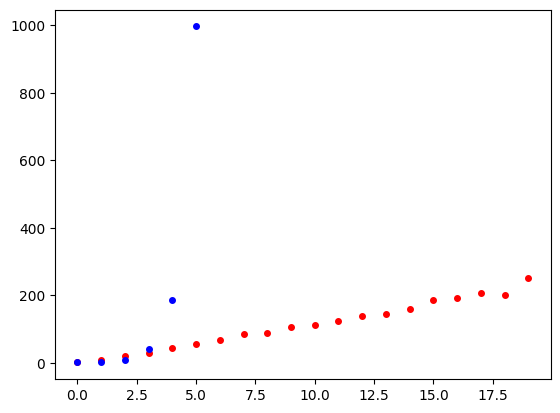

In [40]:
plt.plot(time_data, 'ro', label='time_data', markersize=4)
plt.plot(time_data_bf, 'bo', label='time_data', markersize=4)